## Домашнє завдання до модуля «Алгоритми навчання з вчителем Ч.2»

### 1. Здійсніть імпорт необхідних пакетів.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


 ### 2. Завантажте набір даних Rain in Australia

In [2]:


data = pd.read_csv('weather_data.csv')
print(data.head())


         Date Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
0  2008-12-01   Albury     13.4  ...     21.8         No            No
1  2008-12-02   Albury      7.4  ...     24.3         No            No
2  2008-12-03   Albury     12.9  ...     23.2         No            No
3  2008-12-04   Albury      9.2  ...     26.5         No            No
4  2008-12-05   Albury     17.5  ...     29.7         No            No

[5 rows x 23 columns]


In [3]:
# Підрахунок пропущених значень
missing_values = data.isnull().sum()

# Відображення кількості пропущених значень у кожному стовпці
print(missing_values)

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


### 3: Видалення ознак з великою кількістю пропущених значень

In [4]:
# Визначення порогу для видалення колонок
missing_threshold = 0.3  # Наприклад, видаляємо ознаки з >30% пропусків
missing_fraction = data.isnull().mean()

# Видалення колонок
data = data.loc[:, missing_fraction <= missing_threshold]
print("Після видалення колонок з великою кількістю пропусків:")
print(data.info())


Після видалення колонок з великою кількістю пропусків:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   WindGustDir    135134 non-null  object 
 6   WindGustSpeed  135197 non-null  float64
 7   WindDir9am     134894 non-null  object 
 8   WindDir3pm     141232 non-null  object 
 9   WindSpeed9am   143693 non-null  float64
 10  WindSpeed3pm   142398 non-null  float64
 11  Humidity9am    142806 non-null  float64
 12  Humidity3pm    140953 non-null  float64
 13  Pressure9am    130395 non-null  float64
 14  Pressure3pm    130432 non-null  float64
 15  Temp9am        143693 non-null  float64
 16  Temp3pm        1418

### 3.2. Створіть підмножини набору даних із числовими та категоріальними ознаками.

In [5]:
# Перевірка типів даних
print("Типи даних у наборі:")
print(data.dtypes)


Типи даних у наборі:
Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object


In [6]:
# Поділ ознак на числові та категоріальні
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object']).columns

# Підмножини для числових та категоріальних ознак
numerical_data = data[numerical_features]
categorical_data = data[categorical_features]

# Перевірка
print("Числові ознаки:")
print(numerical_features)
print("\nКатегоріальні ознаки:")
print(categorical_features)



Числові ознаки:
Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm'],
      dtype='object')

Категоріальні ознаки:
Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')


### 3.3. Змініть тип колонки Date на тип datetimeі створіть додаткові колонки Year та Month.

In [7]:
# Перетворення колонки Date на тип datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Перевірка наявності пропусків після конвертації
print(f"Пропуски в колонці 'Date' після перетворення: {data['Date'].isnull().sum()}")

Пропуски в колонці 'Date' після перетворення: 0


In [8]:
# Створення колонок Year та Month
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

# Перевірка результату
print("Перші кілька рядків після створення колонок Year та Month:")
print(data[['Date', 'Year', 'Month']].head())

Перші кілька рядків після створення колонок Year та Month:
        Date  Year  Month
0 2008-12-01  2008     12
1 2008-12-02  2008     12
2 2008-12-03  2008     12
3 2008-12-04  2008     12
4 2008-12-05  2008     12


In [9]:
# Унікальні значення в колонках Year і Month
print("Унікальні значення в колонці 'Year':", data['Year'].unique())
print("Унікальні значення в колонці 'Month':", data['Month'].unique())


Унікальні значення в колонці 'Year': [2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2007]
Унікальні значення в колонці 'Month': [12  1  2  3  4  5  6  7  8  9 10 11]


###  3.4. Переміcтить створену нову колонку Year з підмножини набору із категоріальними ознаками до підмножини із числовими ознаками.

In [10]:
# Додавання колонки 'Year' до числових ознак
numerical_features = numerical_features.append(pd.Index(['Year']))
numerical_data = data[numerical_features]

# Видалення колонки 'Year' із категоріальних ознак, якщо вона там є
categorical_features = categorical_features.difference(['Year'])
categorical_data = data[categorical_features]

# Додавання 'Month' до категоріальних ознак, якщо вона там ще не присутня
if 'Month' not in categorical_features:
    categorical_features = categorical_features.append(pd.Index(['Month']))
    categorical_data = data[categorical_features]

# Перевірка
print("Оновлений список числових ознак:")
print(numerical_features)

print("\nОновлений список категоріальних ознак:")
print(categorical_features)



Оновлений список числових ознак:
Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'Year'],
      dtype='object')

Оновлений список категоріальних ознак:
Index(['Date', 'Location', 'RainToday', 'RainTomorrow', 'WindDir3pm',
       'WindDir9am', 'WindGustDir', 'Month'],
      dtype='object')


In [11]:
# Перевірка типу Year
print(f"Тип колонки 'Year': {data['Year'].dtype}")

# Переведення Month у категоріальний тип, якщо це ще не зроблено
data['Month'] = data['Month'].astype('category')
print(f"Тип колонки 'Month': {data['Month'].dtype}")


Тип колонки 'Year': int32
Тип колонки 'Month': category


In [12]:
# Відображення кількості колонок у підмножинах
print(f"Кількість числових ознак: {numerical_data.shape[1]}")
print(f"Кількість категоріальних ознак: {categorical_data.shape[1]}")


Кількість числових ознак: 13
Кількість категоріальних ознак: 8


### 3.5. Розбийте підмножини на тренувальну і тестову вибірки за такою логікою: до тестової вибірки віднесіть всі об'єкти із набору даних із останнім (максимальним) роком спостережень, а для навчання моделі залиште всі інші об'єкти.

In [13]:
# Визначення максимального року
max_year = data['Year'].max()
print(f"Максимальний рік у даних: {max_year}")



Максимальний рік у даних: 2017


In [14]:
# Булева індексація для розбиття
test_data = data[data['Year'] == max_year]
train_data = data[data['Year'] < max_year]

# Перевірка розмірів вибірок
print(f"Розмір тренувальної вибірки: {train_data.shape}")
print(f"Розмір тестової вибірки: {test_data.shape}")


Розмір тренувальної вибірки: (136837, 21)
Розмір тестової вибірки: (8623, 21)


In [15]:
# Перевірка, що в тестовій вибірці лише дані з останнього року
print(f"Унікальні роки в тестовій вибірці: {test_data['Year'].unique()}")


Унікальні роки в тестовій вибірці: [2017]


In [16]:
numerical_features = train_data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = train_data.select_dtypes(include=['object', 'category']).columns


In [17]:
# Перевірка унікальних років у кожній вибірці
print(f"Унікальні роки у тренувальній вибірці: {train_data['Year'].unique()}")
print(f"Унікальні роки у тестовій вибірці: {test_data['Year'].unique()}")



Унікальні роки у тренувальній вибірці: [2008 2009 2010 2011 2012 2013 2014 2015 2016 2007]
Унікальні роки у тестовій вибірці: [2017]


### 4. Відновіть пропущені дані за допомогою об'єкта SimpleImputer з пакету sklearn.

In [18]:
from sklearn.impute import SimpleImputer

In [19]:
# Видалення рядків із пропусками в цільовій змінній
# Припустимо, що цільова змінна називається 'RainTomorrow'
data = data.dropna(subset=['RainTomorrow'])

# Ідентифікація числових та категоріальних ознак
numerical_columns = numerical_data.columns
categorical_columns = categorical_data.columns

# Імп'ютер для числових даних: заміна пропусків на середнє
numerical_imputer = SimpleImputer(strategy='mean')
numerical_data_imputed = pd.DataFrame(
    numerical_imputer.fit_transform(numerical_data),
    columns=numerical_columns
)

# Імп'ютер для категоріальних даних: заміна пропусків на найпоширеніше значення
categorical_imputer = SimpleImputer(strategy='most_frequent')
categorical_data_imputed = pd.DataFrame(
    categorical_imputer.fit_transform(categorical_data),
    columns=categorical_columns
)

# Оновлення основного датасету
data_imputed = pd.concat([numerical_data_imputed, categorical_data_imputed, data[['RainTomorrow']]], axis=1)

# Перевірка наявності пропусків після імп'ютації
print("Кількість пропусків у даних після імп'ютації:")
print(data_imputed.isnull().sum())


Кількість пропусків у даних після імп'ютації:
MinTemp             0
MaxTemp             0
Rainfall            0
WindGustSpeed       0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Temp9am             0
Temp3pm             0
Year                0
Date                0
Location            0
RainToday           0
RainTomorrow        0
WindDir3pm          0
WindDir9am          0
WindGustDir         0
Month               0
RainTomorrow     3267
dtype: int64


### 5. Нормалізуйте числові ознаки за допомогою об'єкта StandardScaler з пакету sklearn.

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
# Створення об'єкта StandardScaler
scaler = StandardScaler()

# Масштабування числових даних
numerical_data_scaled = pd.DataFrame(
    scaler.fit_transform(numerical_data_imputed),
    columns=numerical_data_imputed.columns
)

# Перевірка результату
print("Перші кілька рядків нормалізованих числових даних:")
print(numerical_data_scaled.head())




Перші кілька рядків нормалізованих числових даних:
    MinTemp   MaxTemp  Rainfall  ...   Temp9am   Temp3pm      Year
0  0.189447 -0.045336 -0.210072  ... -0.014053  0.017023 -1.879575
1 -0.753101  0.265043 -0.281650  ...  0.032464  0.381985 -1.879575
2  0.110901  0.349692 -0.281650  ...  0.621685  0.221402 -1.879575
3 -0.470337  0.674180 -0.281650  ...  0.172017  0.703151 -1.879575
4  0.833521  1.280830 -0.162353  ...  0.125499  1.170302 -1.879575

[5 rows x 13 columns]


### 6. Виконайте кодування категоріальних ознак за допомогою об’єкта OneHotEncoder з пакету sklearn.

In [22]:
from sklearn.preprocessing import OneHotEncoder


In [23]:
encoder = OneHotEncoder(drop='first', sparse_output=False)



In [24]:
# Виконання one-hot encoding для категоріальних даних
categorical_data_encoded = encoder.fit_transform(categorical_data_imputed)

# Перетворення результату на DataFrame з відповідними назвами колонок
categorical_encoded_columns = encoder.get_feature_names_out(categorical_data_imputed.columns)
categorical_data_encoded_df = pd.DataFrame(
    categorical_data_encoded,
    columns=categorical_encoded_columns,
    index=categorical_data_imputed.index
)

# Перевірка результату
print("Перші кілька рядків закодованих категоріальних даних:")
print(categorical_data_encoded_df.head())


Перші кілька рядків закодованих категоріальних даних:
   Date_2007-11-02T00:00:00.000000000  ...  Month_12
0                                 0.0  ...       1.0
1                                 0.0  ...       1.0
2                                 0.0  ...       1.0
3                                 0.0  ...       1.0
4                                 0.0  ...       1.0

[5 rows x 3541 columns]


### 7. Об'єднайте підмножини з числовими і категоріальними ознаками (після кодування) для побудови моделі за допомогою об’єкта LogisticRegression з пакету sklearn.

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [30]:
print(data_imputed['RainTomorrow'].head())  # Виводимо перші кілька значень
print(data_imputed['RainTomorrow'].shape)  # Перевіряємо форму даних


0    No
1    No
2    No
3    No
4    No
Name: RainTomorrow, dtype: object
(145460,)


In [31]:
print(data_imputed.columns.duplicated())


[False False False False False False False False False False False False
 False False False False False False False False False]


In [32]:
# Видалення дублікатів колонок
data_imputed = data_imputed.loc[:, ~data_imputed.columns.duplicated()]

# Створення цільової змінної (y)
y = data_imputed['RainTomorrow'].values.ravel()

# Формування X із числових та категоріальних ознак
X = pd.concat([numerical_data_scaled, categorical_data_encoded_df], axis=1)

# Перевірка розмірів X та y
print(f"Розмір X: {X.shape}")
print(f"Розмір y: {y.shape}")

# Видалення колонки 'RainTomorrow_Yes' із X
X = X.drop(columns=['RainTomorrow_Yes'], errors='ignore')

# Повторне розділення даних
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Створення та навчання моделі
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)

# Оцінка моделі
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Точність моделі LogisticRegression після виправлення: {accuracy:.4f}")


Розмір X: (145460, 3554)
Розмір y: (145460,)
Точність моделі LogisticRegression після виправлення: 0.8509


In [33]:
# 5. Проведення експериментів із solver
solvers = ['liblinear', 'lbfgs', 'newton-cg']
results = {}

for solver in solvers:
    model = LogisticRegression(solver=solver, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    results[solver] = accuracy
    print(f"Точність для solver='{solver}': {accuracy:.4f}")

# Порівняння результатів
print("\nРезультати експериментів з різними solvers:")
for solver, acc in results.items():
    print(f"{solver}: {acc:.4f}")

Точність для solver='liblinear': 0.8509
Точність для solver='lbfgs': 0.8504
Точність для solver='newton-cg': 0.8509

Результати експериментів з різними solvers:
liblinear: 0.8509
lbfgs: 0.8504
newton-cg: 0.8509


In [34]:
# Перевірка, чи цільова змінна міститься в X_train
if 'RainTomorrow' in X_train.columns:
    print("Цільова змінна 'RainTomorrow' є у X_train!")
else:
    print("Цільової змінної 'RainTomorrow' немає у X_train.")


Цільової змінної 'RainTomorrow' немає у X_train.


In [35]:
# Пошук колонок, які містять назву 'Rain'
columns_with_rain = [col for col in X_train.columns if 'Rain' in col]
print(f"Колонки у X_train, що містять 'Rain': {columns_with_rain}")


Колонки у X_train, що містять 'Rain': ['Rainfall', 'RainToday_Yes']


In [36]:
# Перевірка, чи є колонка 'RainTomorrow_No' у X
if 'RainTomorrow_No' in X.columns:
    print("Колонка 'RainTomorrow_No' є у X!")
else:
    print("Колонки 'RainTomorrow_No' немає у X.")


Колонки 'RainTomorrow_No' немає у X.


1. Точність моделі після виправлення: 0.8509

    - Це свідчить про те, що модель логістичної регресії працює адекватно. Видалення колонки RainTomorrow_Yes, яка була похідною від цільової змінної, виправило переобучення.

2. Результати з різними solver:

    - Точність для різних solver (наприклад, liblinear, lbfgs, newton-cg) залишилася майже ідентичною, що підтверджує стабільність результатів.

3. Важливість перевірки колонок:

    - Колонки Rainfall та RainToday_Yes можуть бути важливими предикторами, але вони не є безпосередньо похідними від цільової змінної. Модель не "знає" відповіді заздалегідь.


### Додаткові метрики (рекомендовано для аналізу): Використовуйте класифікаційний звіт (classification_report) для детальної оцінки.

In [37]:
from sklearn.metrics import classification_report

print("Класифікаційний звіт:")
print(classification_report(y_test, y_pred))


Класифікаційний звіт:
              precision    recall  f1-score   support

          No       0.87      0.95      0.91     22672
         Yes       0.73      0.52      0.60      6420

    accuracy                           0.85     29092
   macro avg       0.80      0.73      0.76     29092
weighted avg       0.84      0.85      0.84     29092



In [38]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Матриця плутанини:")
print(cm)


Матриця плутанини:
[[21434  1238]
 [ 3101  3319]]


Унікальні значення після перекодування: {np.int64(0), np.int64(1)}


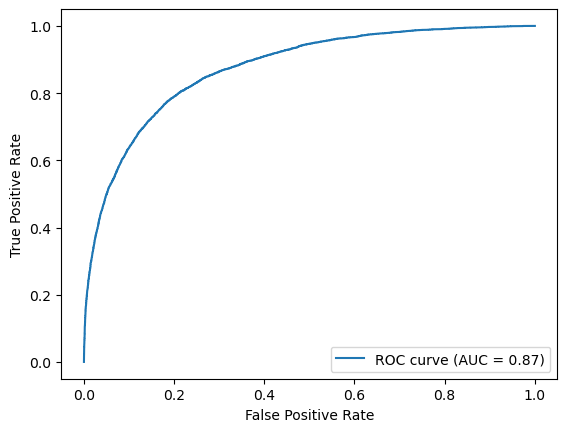

In [80]:
from sklearn.preprocessing import LabelEncoder

# Перекодування цільової змінної
le = LabelEncoder()
y_test_numeric = le.fit_transform(y_test)  # 'No' -> 0, 'Yes' -> 1

# Перевірка перекодування
print(f"Унікальні значення після перекодування: {set(y_test_numeric)}")  # Має бути {0, 1}

# Побудова ROC-кривої
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_prob)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc_score:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


### Висновки:
Модель добре справляється із класифікацією:

AUC = 0.87 означає, що модель має високий рівень передбачення правильних результатів.
